In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지
from matplotlib import font_manager,rc
import pykrx
import seaborn as sns
from pykrx import stock

#폰트 경로
font_path = "C:/Windows/Fonts/gulim.ttc"
#폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

In [2]:
kospi_df = stock.get_index_ohlcv_by_date("20181101", "20201102", "1001")
kospi_df = kospi_df.reset_index(drop = False)
kospi_df = kospi_df.iloc[:,[0,4]]
kospi_df.columns = ['Date', 'KOSPI']
kospi_df

,Date,KOSPI
0,2018-11-01,2024.46
1,2018-11-02,2096.00
2,2018-11-05,2076.92
3,2018-11-06,2089.62
4,2018-11-07,2078.69
...,...,...
489,2020-10-27,2330.84
490,2020-10-28,2345.26
491,2020-10-29,2326.67
492,2020-10-30,2267.15


In [3]:
wdhs_ver3_df = pd.read_csv("resources/wdhs_ver1/wdhs_ver1_df.csv", parse_dates=['Date'], index_col=[0], encoding = "euc-kr")
wdhs_ver3_df

,P_score,predict,real,stock_name,stock_code,Date,Nasdaq
0,98.42,P0,M0,그린케미칼,83420,2020-10-30,U04
0,90.39,P0,M0,파이오링크,170790,2020-10-30,U04
0,88.88,P0,M0,이엑스티,226360,2020-10-30,U04
0,81.02,P0,M0,세진중공업,75580,2020-10-30,U04
0,76.19,P0,M0,SK하이닉스,660,2020-10-30,U04
...,...,...,...,...,...,...,...
0,96.47,P0,M0,SFA반도체,36540,2018-11-01,U04
0,90.69,P0,M0,한화에어로스페이스,12450,2018-11-01,U04
0,90.41,P0,M0,하이록코리아,13030,2018-11-01,U04
0,90.04,P0,M0,월덱스,101160,2018-11-01,U04


In [5]:
wdhs_ver3_winlose_test = pd.read_csv("resources/wdhs_ver1/wdhs_ver1_winlose_table_10,4,7.5,3,5.csv", parse_dates=['Date'], index_col=[0], encoding = "euc-kr")
wdhs_ver3_winlose_test = wdhs_ver3_winlose_test.sort_values("Date")
wdhs_ver3_winlose_test

,Date,stock_name,today_big_win,today_small_win,today_lose,tomorrow_big_win,tomorrow_small_win,tomorrow_lose,day2_big_win,day2_small_win,day2_lose,real_profit,Nasdaq,P_score
0,2018-11-01,동아에스티,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.037170,U04,89.69
0,2018-11-01,SFA반도체,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017668,U04,96.47
0,2018-11-01,월덱스,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.067742,U04,90.04
0,2018-11-01,하이록코리아,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.056893,U04,90.41
0,2018-11-01,한화에어로스페이스,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.043937,U04,90.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2020-10-30,SK하이닉스,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.003672,U04,76.19
0,2020-10-30,세진중공업,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.292708,U04,81.02
0,2020-10-30,이엑스티,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.051327,U04,88.88
0,2020-10-30,파이오링크,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.015209,U04,90.39


In [10]:
holy_2019 = pd.read_excel('resources/holiday/2019_holi.xls', parse_dates=["일자 및 요일"])
holy_2018 = pd.read_excel('resources/holiday/2018_holi.xls', parse_dates=["일자 및 요일"])
holy_2020 = pd.read_excel('resources/holiday/2020_holi.xls', parse_dates=["일자 및 요일"])
test_holy = pd.concat([holy_2019["일자 및 요일"], holy_2018["일자 및 요일"], holy_2020["일자 및 요일"]])
holy_list = list(test_holy)

sum_money = 10000000
df_date = "뒁바보"
wdhs_ver3_yield_df = pd.DataFrame({"Date" : [], "sum_money" : []})
wdhs_ver3_invest_df = pd.DataFrame({"stdate" : [], "endate" :[], "profit" : [], "invest_money" : []})

for i in range(len(wdhs_ver3_winlose_test)) :
    if wdhs_ver3_winlose_test.iloc[i,2] + wdhs_ver3_winlose_test.iloc[i,3] + wdhs_ver3_winlose_test.iloc[i,4] == 1 :
        pl_day = 0
    elif wdhs_ver3_winlose_test.iloc[i,5] + wdhs_ver3_winlose_test.iloc[i,6] + wdhs_ver3_winlose_test.iloc[i,7] == 1 :
        pl_day = 1
    elif wdhs_ver3_winlose_test.iloc[i,8] + wdhs_ver3_winlose_test.iloc[i,9] + wdhs_ver3_winlose_test.iloc[i,10] == 1 :
        pl_day = 2
    endate = wdhs_ver3_winlose_test.iloc[i,0]+datetime.timedelta(days = pl_day)
    while endate in holy_list or endate.weekday() > 4:
        endate = endate + datetime.timedelta(days = 1)
        
    temp_df = pd.DataFrame({"stdate" :[wdhs_ver3_winlose_test.iloc[i,0]], "endate" : endate,
                           "profit" : [wdhs_ver3_winlose_test.iloc[i,11]], "invest_money" : [0]})
    wdhs_ver3_invest_df = wdhs_ver3_invest_df.append(temp_df)

wdhs_ver3_yield_df["Date"] = pd.concat([wdhs_ver3_invest_df["stdate"], wdhs_ver3_invest_df["endate"]]).unique()
wdhs_ver3_yield_df = wdhs_ver3_yield_df.sort_values("Date")
wdhs_ver3_invest_df = wdhs_ver3_invest_df.reset_index(drop = True)

for num in range(len(wdhs_ver3_yield_df["Date"])) : 
    st_index = wdhs_ver3_invest_df[wdhs_ver3_invest_df["stdate"] == wdhs_ver3_yield_df.iloc[num,0]].index
    for st_idx in range(len(st_index)) :
        wdhs_ver3_invest_df.iloc[st_index[st_idx], 3] = sum_money // 10
    ed_index = wdhs_ver3_invest_df[wdhs_ver3_invest_df["endate"] == wdhs_ver3_yield_df.iloc[num, 0]].index
    if len(ed_index) == 0 :
        wdhs_ver3_yield_df.iloc[num,1] = wdhs_ver3_yield_df.iloc[num-1,1]
    if num == 0 :
        wdhs_ver3_yield_df.iloc[0,1] = sum_money
        continue
    for ed_idx in range(len(ed_index)):
         sum_money = sum_money + (wdhs_ver3_invest_df.iloc[ed_index[ed_idx], 3] * (1+wdhs_ver3_invest_df.iloc[ed_index[ed_idx], 2]))*0.9975 - wdhs_ver3_invest_df.iloc[ed_index[ed_idx], 3]
    wdhs_ver3_yield_df.iloc[num, 1] = sum_money
print(wdhs_ver3_yield_df)
wdhs_ver3_invest_df

          Date     sum_money
0   2018-11-01  1.000000e+07
1   2018-11-02  1.035324e+07
2   2018-11-05  1.037217e+07
3   2018-11-06  1.028397e+07
4   2018-11-07  1.025585e+07
..         ...           ...
489 2020-10-27  7.895814e+06
490 2020-10-28  8.095869e+06
491 2020-10-29  8.108538e+06
492 2020-10-30  7.763251e+06
493 2020-11-02  7.672444e+06

[494 rows x 2 columns]


,stdate,endate,profit,invest_money
0,2018-11-01,2018-11-02,0.037170,1000000.0
1,2018-11-01,2018-11-01,0.017668,1000000.0
2,2018-11-01,2018-11-01,-0.067742,1000000.0
3,2018-11-01,2018-11-05,-0.056893,1000000.0
4,2018-11-01,2018-11-01,-0.043937,1000000.0
...,...,...,...,...
2460,2020-10-30,2020-11-02,-0.003672,810853.0
2461,2020-10-30,2020-10-30,-0.292708,810853.0
2462,2020-10-30,2020-11-02,-0.051327,810853.0
2463,2020-10-30,2020-11-02,0.015209,810853.0


In [11]:
kospi_wdhs_ver3_df = pd.merge(kospi_df, wdhs_ver3_yield_df, left_on='Date', right_on='Date', how='left')
kospi_wdhs_ver3_df.iloc[0,2] = 10000000 
kospi_wdhs_ver3_df = kospi_wdhs_ver3_df.fillna(method='ffill')
kospi_wdhs_ver3_df = kospi_wdhs_ver3_df.drop(len(kospi_wdhs_ver3_df)-1)
kospi_wdhs_ver3_df

,Date,KOSPI,sum_money
0,2018-11-01,2024.46,1.000000e+07
1,2018-11-02,2096.00,1.035324e+07
2,2018-11-05,2076.92,1.037217e+07
3,2018-11-06,2089.62,1.028397e+07
4,2018-11-07,2078.69,1.025585e+07
...,...,...,...
488,2020-10-26,2343.91,7.900174e+06
489,2020-10-27,2330.84,7.895814e+06
490,2020-10-28,2345.26,8.095869e+06
491,2020-10-29,2326.67,8.108538e+06


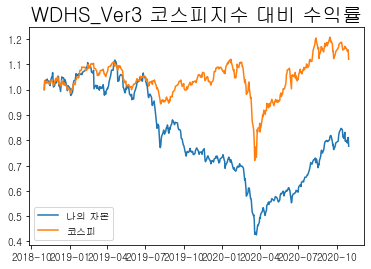

In [12]:
plt.plot(kospi_wdhs_ver3_df["Date"], kospi_wdhs_ver3_df["sum_money"]/kospi_wdhs_ver3_df.iloc[0,2], label = '나의 자본')	# line 그래프를 그립니다
plt.plot(kospi_wdhs_ver3_df["Date"], kospi_wdhs_ver3_df["KOSPI"]/kospi_wdhs_ver3_df.iloc[0,1], label = '코스피')	# line 그래프를 그립니다
#font 설정
plt.rc('font',family=font_name)
plt.rcParams["figure.figsize"] = (20,4)
plt.rcParams['axes.grid'] = True
plt.legend(loc = 'best')
plt.title('WDHS_Ver3 코스피지수 대비 수익률', fontsize=20)
plt.show()	# 그래프를 화면에 보여줍니다

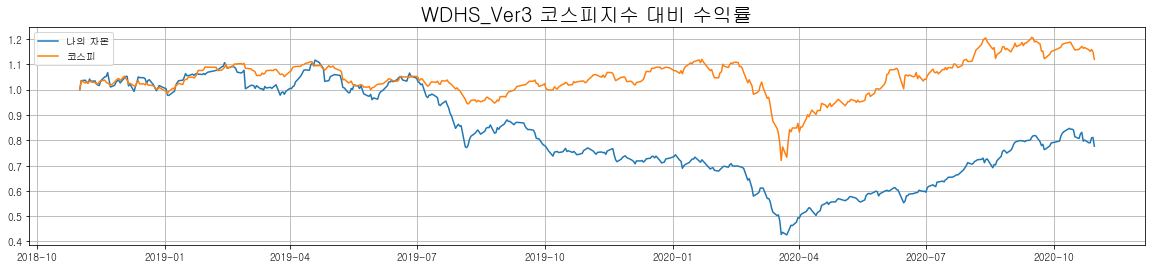

In [13]:
plt.plot(kospi_wdhs_ver3_df["Date"], kospi_wdhs_ver3_df["sum_money"]/(kospi_wdhs_ver3_df.iloc[0,2]), label = '나의 자본')	# line 그래프를 그립니다
plt.plot(kospi_wdhs_ver3_df["Date"], kospi_wdhs_ver3_df["KOSPI"]/kospi_wdhs_ver3_df.iloc[0,1], label = '코스피')	# line 그래프를 그립니다
#font 설정
plt.rc('font',family=font_name)
plt.rcParams["figure.figsize"] = (20,4)
plt.rcParams['axes.grid'] = True
plt.legend(loc = 'best')
plt.title('WDHS_Ver3 코스피지수 대비 수익률', fontsize=20)
plt.show()	# 그래프를 화면에 보여줍니다

In [24]:
200*kospi_wdhs_ver3_df.iloc[0,2]

2000000000.0

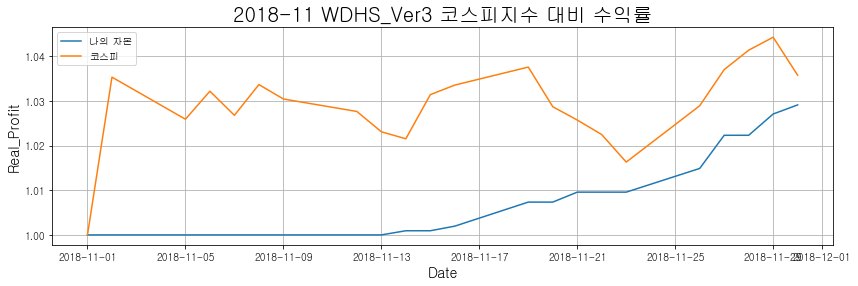

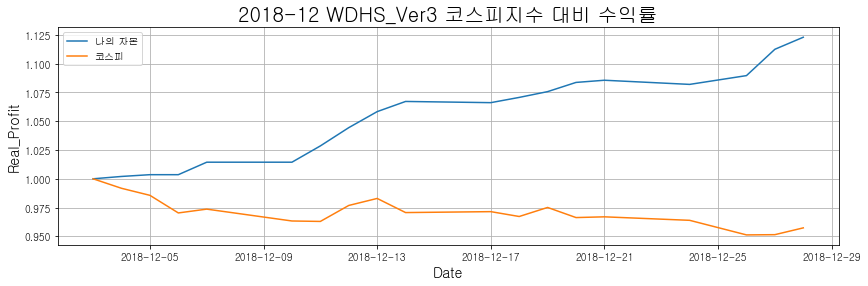

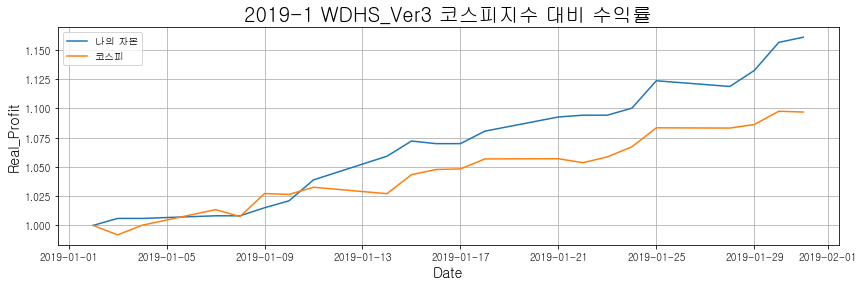

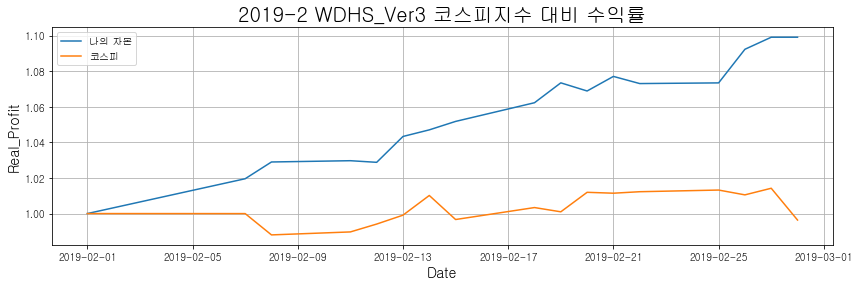

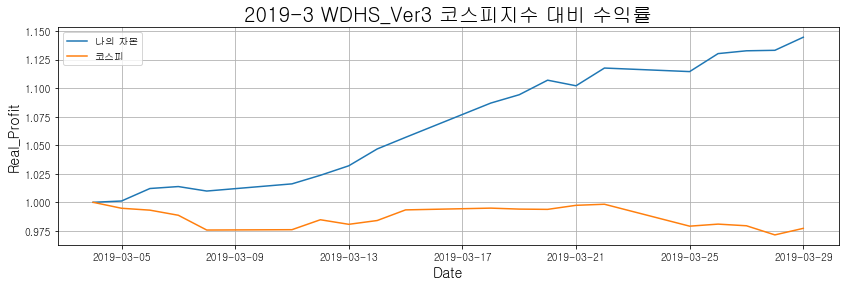

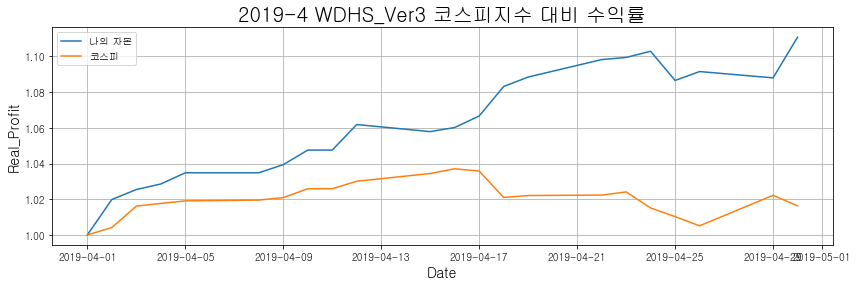

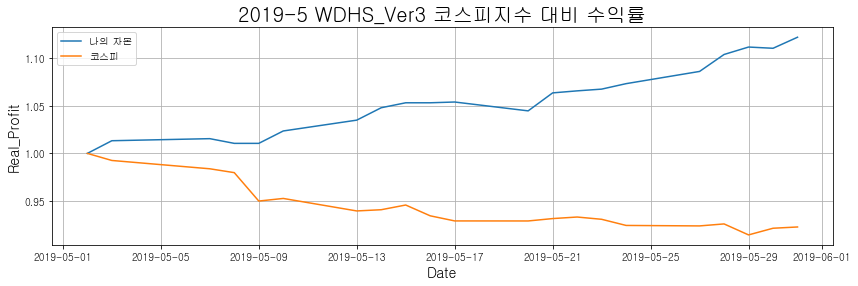

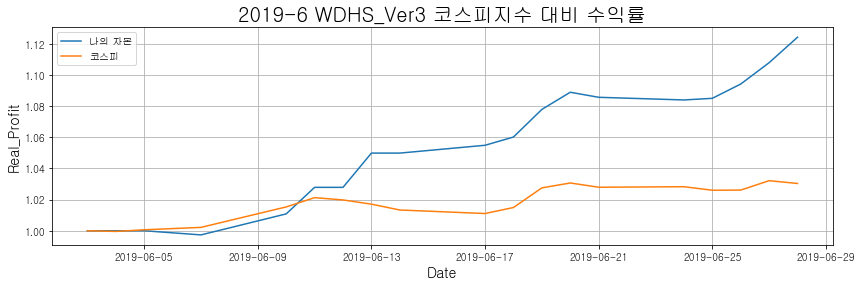

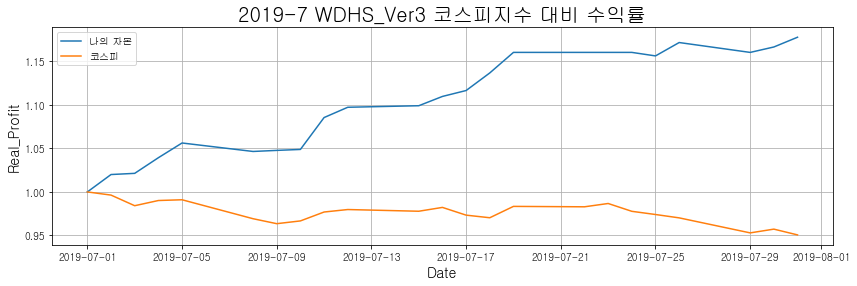

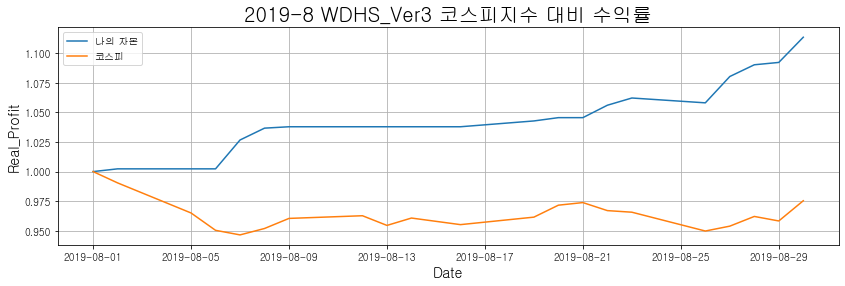

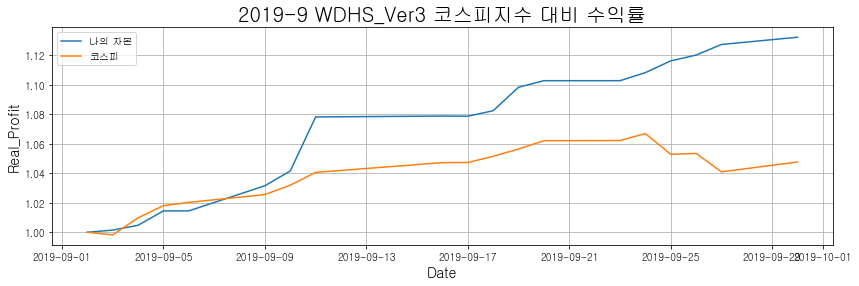

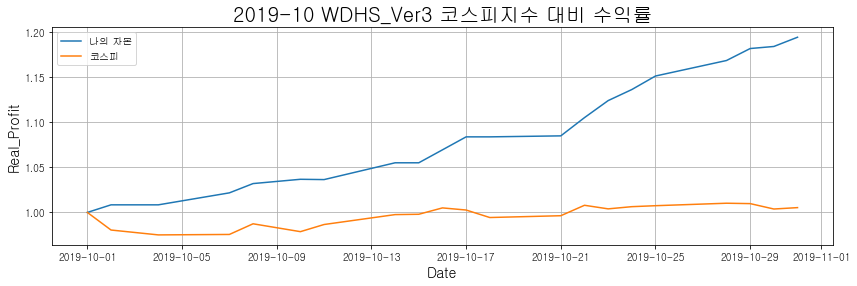

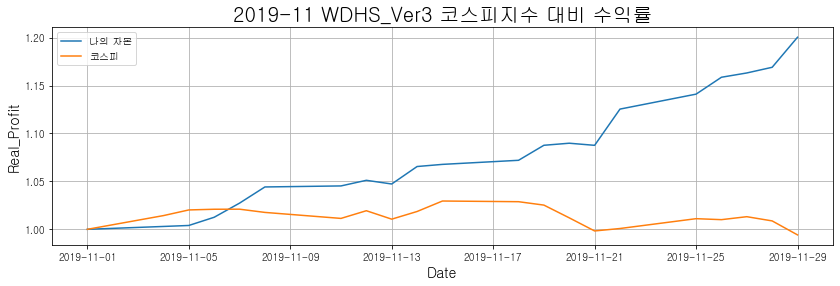

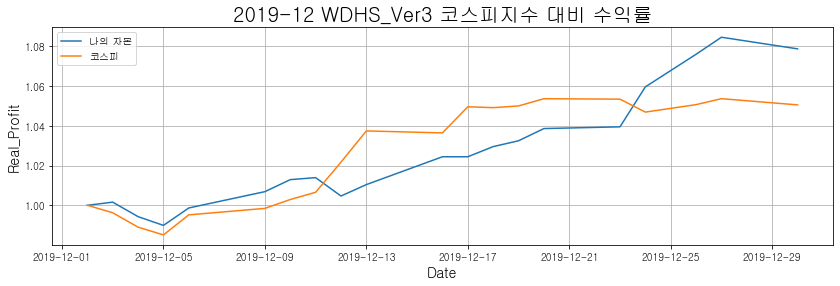

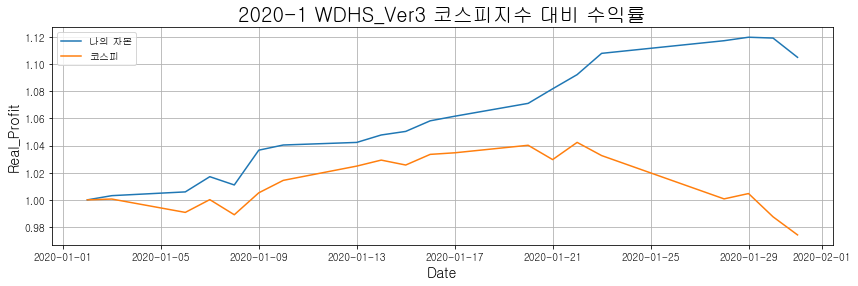

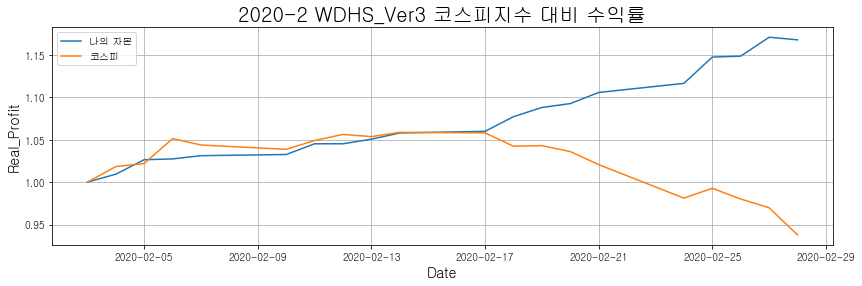

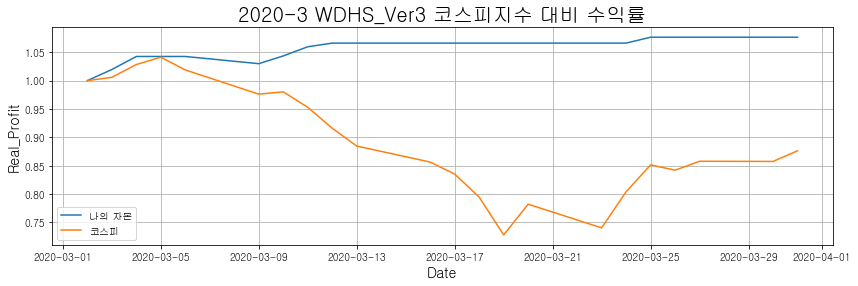

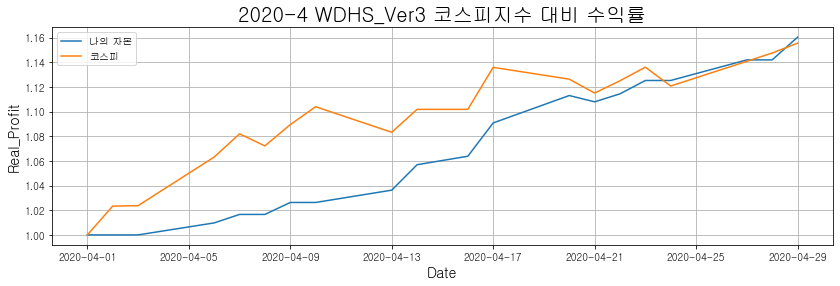

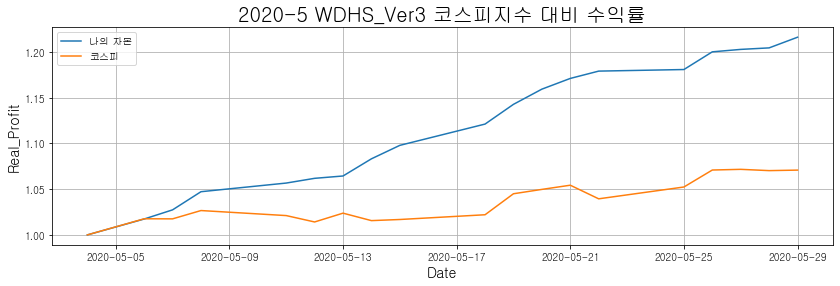

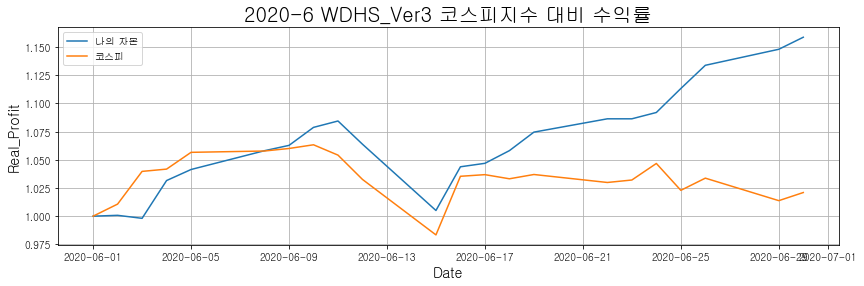

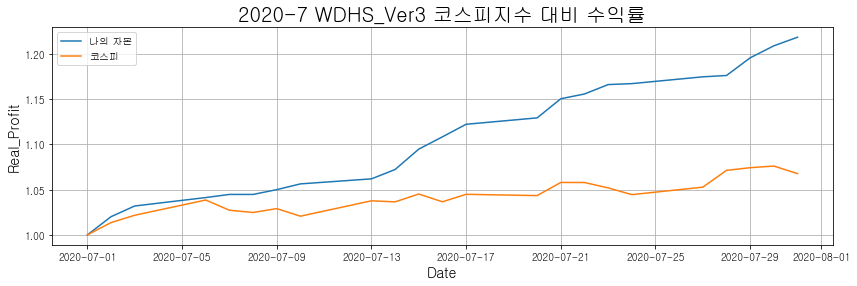

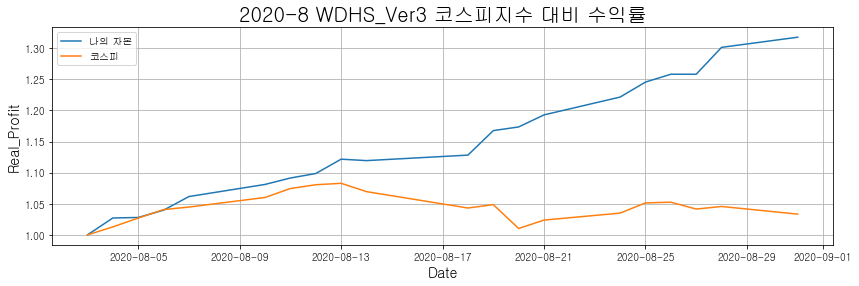

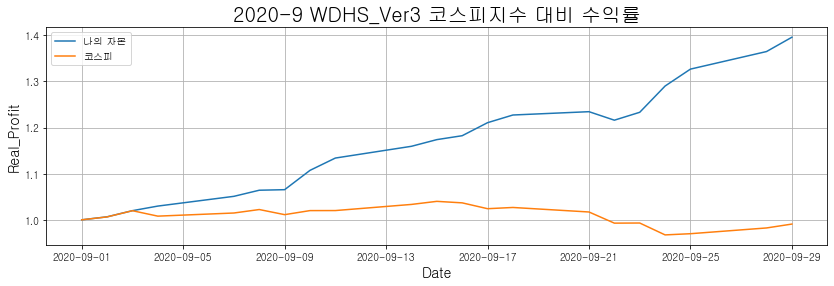

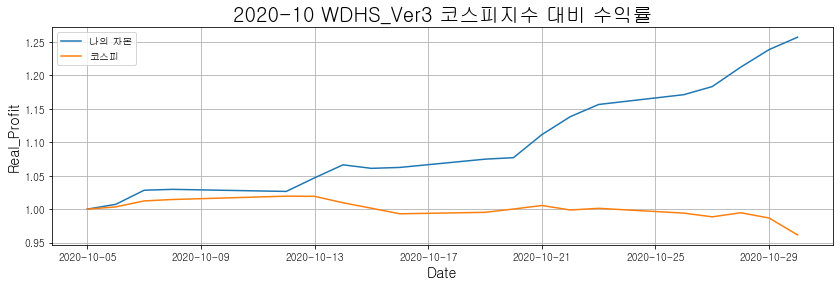

In [14]:
for year_num in range(2018,2021) :
    for month_num in range(1,13) :
        month_df = pd.DataFrame({"Date" : [], "KOSPI" : [], "sum_money" : []})
        for df_num in range(len(kospi_wdhs_ver3_df)):
            if kospi_wdhs_ver3_df.iloc[df_num,0].year == year_num and kospi_wdhs_ver3_df.iloc[df_num,0].month == month_num:
                temp_df = kospi_wdhs_ver3_df.iloc[df_num]
                month_df = month_df.append(temp_df)
        if len(month_df) != 0:
            month_df["KOSPI"] = month_df["KOSPI"] / month_df.iloc[0,1]
            month_df["sum_money"] = month_df["sum_money"] / month_df.iloc[0,2]
            plt.rc('font',family=font_name)
            plt.rcParams["figure.figsize"] = (14,4)
            plt.rcParams['axes.grid'] = True
            plt.plot(month_df["Date"], month_df["sum_money"], label = '나의 자본')	# line 그래프를 그립니다
            plt.plot(month_df["Date"], month_df["KOSPI"], label = '코스피')	# line 그래프를 그립니다
            plt.title('{}-{} WDHS_Ver3 코스피지수 대비 수익률'.format(year_num, month_num), fontsize=20)
            plt.xlabel('Date', fontsize=14)
            plt.ylabel('Real_Profit', fontsize=14)
            plt.legend(loc = 'best')
            plt.show()	# 그래프를 화면에 보여줍니다

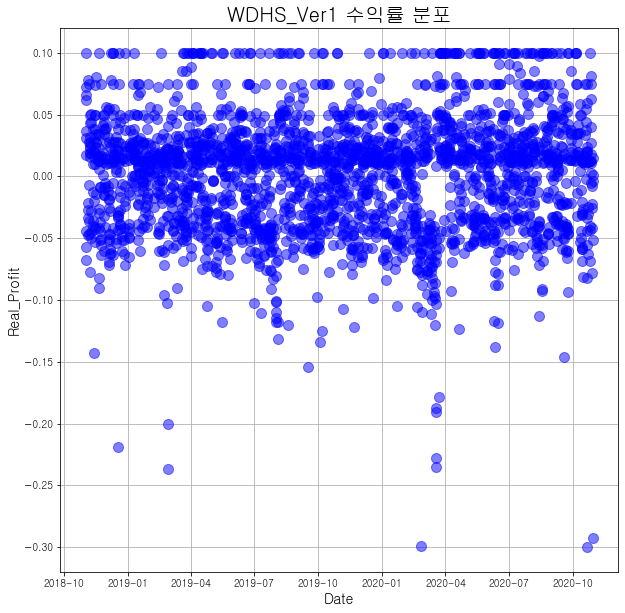

In [108]:
plt.plot('Date',  # x
         'real_profit',  # y
         data=wdhs_ver3_winlose_test, 
         linestyle='none', 
         marker='o', 
         markersize=10,
         color='blue', 
         alpha=0.5)
plt.rc('font', family=font_name)
plt.title('WDHS_Ver1 수익률 분포', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Real_Profit', fontsize=14)
plt.show()

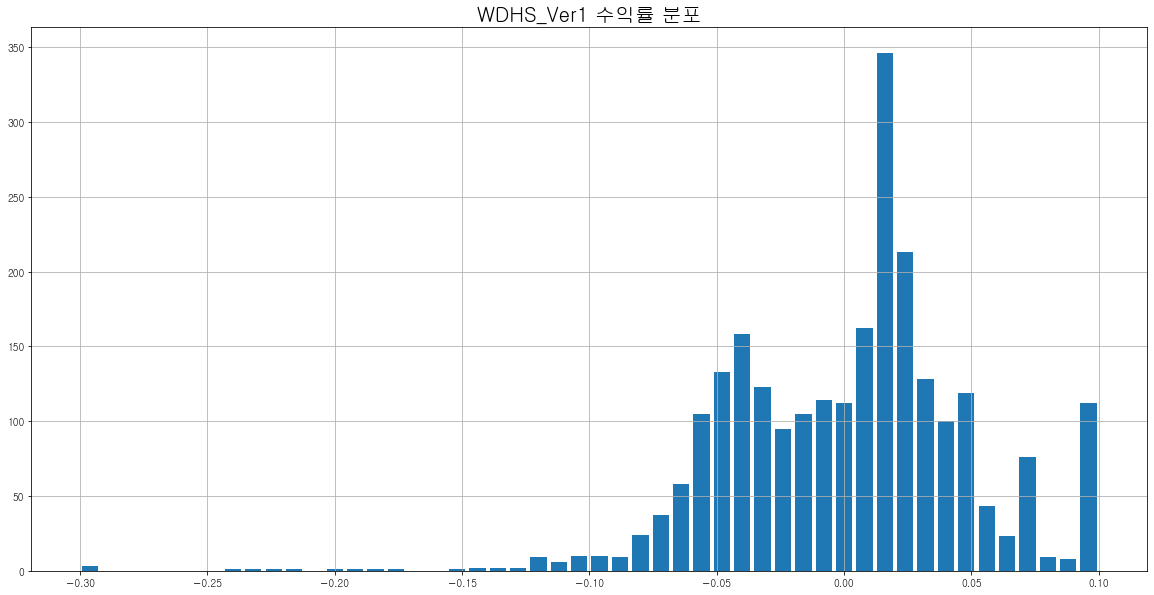

In [19]:
plt.hist(wdhs_ver3_winlose_test["real_profit"], rwidth = 0.8, bins = 50)
plt.rcParams["figure.figsize"] = (20,10)
plt.rc('font',family=font_name)
plt.title('WDHS_Ver1 수익률 분포', fontsize=20)
plt.show()

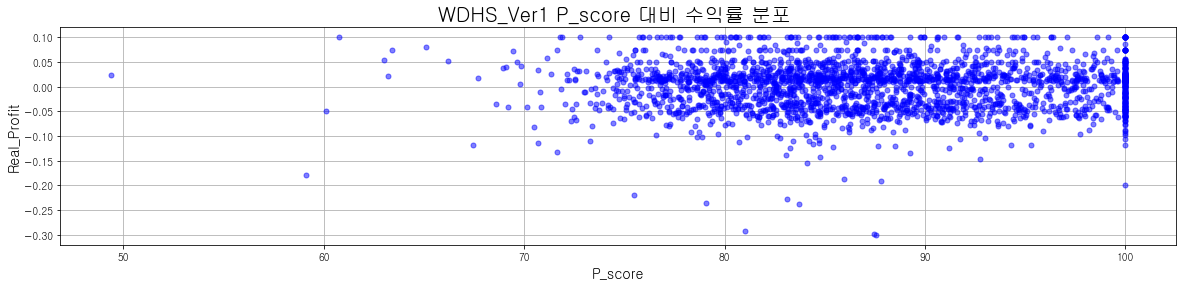

In [16]:
plt.plot('P_score',  # x
         'real_profit',  # y
         data=wdhs_ver3_winlose_test, 
         linestyle='none', 
         marker='.', 
         markersize=10,
         color='blue', 
         alpha=0.5)
plt.rc('font', family=font_name)
plt.title('WDHS_Ver1 P_score 대비 수익률 분포 ', fontsize=20)
plt.xlabel('P_score', fontsize=14)
plt.ylabel('Real_Profit', fontsize=14)
plt.show()

ValueError: Unrecognized character e in format string

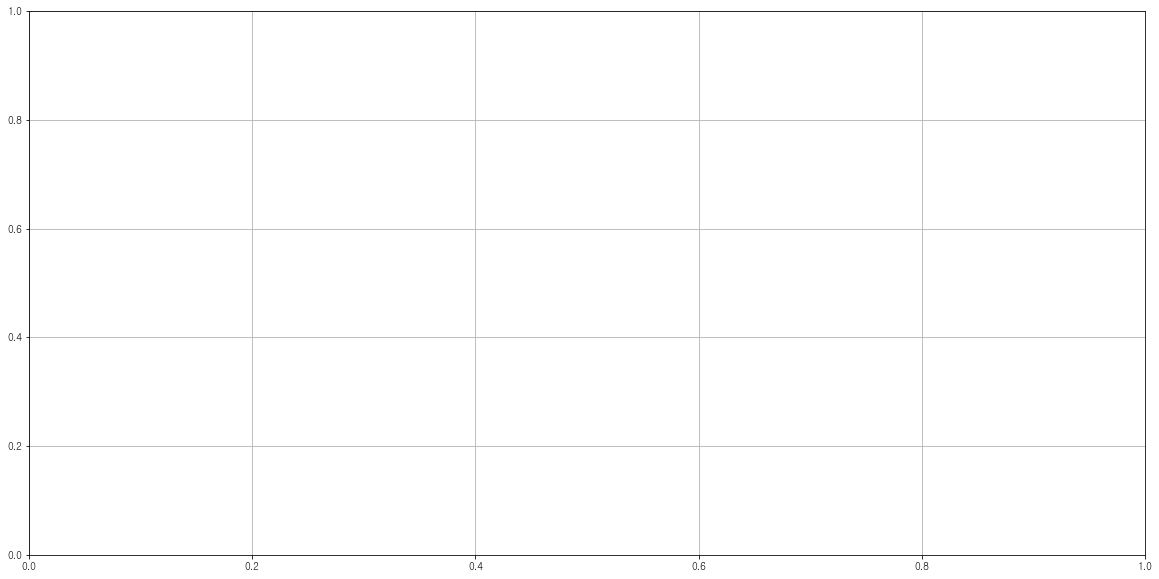

In [20]:
plt.plot('P_score',  # x
         'real_profit',  # y
         data=wdhs_ver3_df, 
         linestyle='none', 
         marker='.', 
         markersize=10,
         color='blue', 
         alpha=0.5)
plt.rc('font', family=font_name)
plt.title('WDHS_Ver1 P_score 대비 수익률 분포 ', fontsize=20)
plt.xlabel('P_score', fontsize=14)
plt.ylabel('real', fontsize=14)
plt.show()

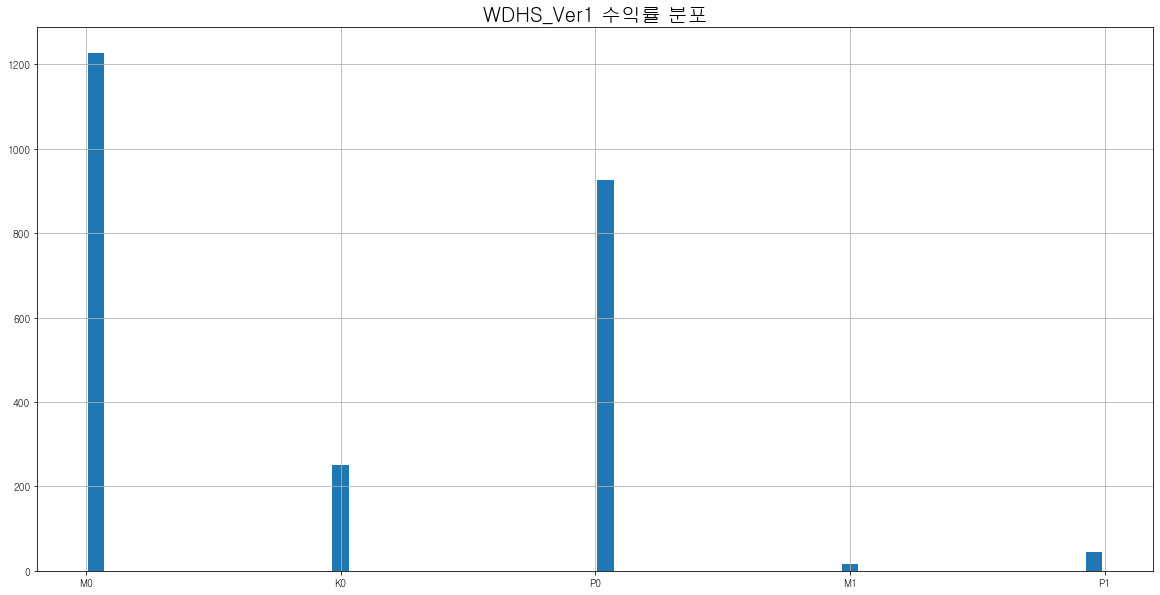

In [21]:
plt.hist(wdhs_ver3_df["real"], rwidth = 0.8, bins = 50)
plt.rcParams["figure.figsize"] = (20,10)
plt.rc('font',family=font_name)
plt.title('WDHS_Ver1 수익률 분포', fontsize=20)
plt.show()

In [23]:
wdhs_ver3_winlose_test["pattern"] = "양봉"
wdhs_ver3_winlose_test

,Date,stock_name,today_big_win,today_small_win,today_lose,tomorrow_big_win,tomorrow_small_win,tomorrow_lose,day2_big_win,day2_small_win,day2_lose,real_profit,Nasdaq,P_score,pattern
0,2018-11-01,동아에스티,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.037170,U04,89.69,양봉
0,2018-11-01,SFA반도체,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017668,U04,96.47,양봉
0,2018-11-01,월덱스,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.067742,U04,90.04,양봉
0,2018-11-01,하이록코리아,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.056893,U04,90.41,양봉
0,2018-11-01,한화에어로스페이스,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.043937,U04,90.69,양봉
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2020-10-30,SK하이닉스,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.003672,U04,76.19,양봉
0,2020-10-30,세진중공업,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.292708,U04,81.02,양봉
0,2020-10-30,이엑스티,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.051327,U04,88.88,양봉
0,2020-10-30,파이오링크,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.015209,U04,90.39,양봉


In [24]:
for i in range(len(wdhs_ver3_winlose_test)) :
    if wdhs_ver3_winlose_test.iloc[i,11] > 0.01 :
        pass
    else : 
        wdhs_ver3_winlose_test.iloc[i, 14] = "음봉"
wdhs_ver3_winlose_test

,Date,stock_name,today_big_win,today_small_win,today_lose,tomorrow_big_win,tomorrow_small_win,tomorrow_lose,day2_big_win,day2_small_win,day2_lose,real_profit,Nasdaq,P_score,pattern
0,2018-11-01,동아에스티,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.037170,U04,89.69,양봉
0,2018-11-01,SFA반도체,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017668,U04,96.47,양봉
0,2018-11-01,월덱스,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.067742,U04,90.04,음봉
0,2018-11-01,하이록코리아,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.056893,U04,90.41,음봉
0,2018-11-01,한화에어로스페이스,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.043937,U04,90.69,음봉
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2020-10-30,SK하이닉스,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.003672,U04,76.19,음봉
0,2020-10-30,세진중공업,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.292708,U04,81.02,음봉
0,2020-10-30,이엑스티,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.051327,U04,88.88,음봉
0,2020-10-30,파이오링크,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.015209,U04,90.39,양봉


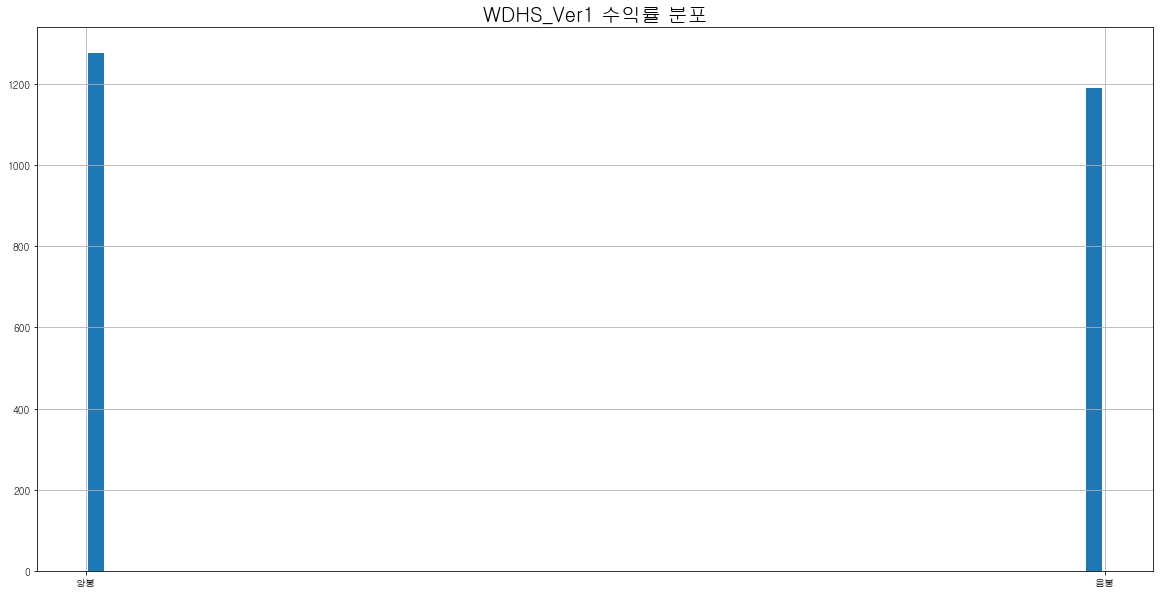

In [25]:
plt.hist(wdhs_ver3_winlose_test["pattern"], rwidth = 0.8, bins = 50)
plt.rcParams["figure.figsize"] = (20,10)
plt.rc('font',family=font_name)
plt.title('WDHS_Ver1 수익률 분포', fontsize=20)
plt.show()

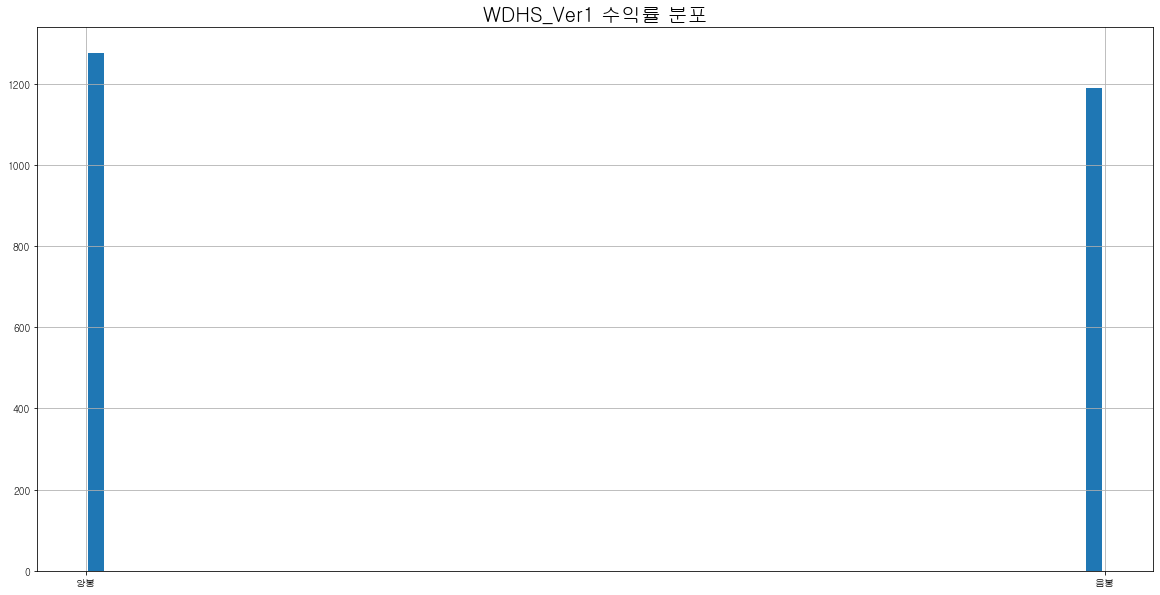

In [50]:
wdhs_ver3_winlose_test_hist1 = wdhs_ver3_winlose_test[wdhs_ver3_winlose_test["P_score"] > 60]
plt.hist(wdhs_ver3_winlose_test_hist1["pattern"], rwidth = 0.8, bins = 50)
plt.rcParams["figure.figsize"] = (20,10)
plt.rc('font',family=font_name)
plt.title('WDHS_Ver1 수익률 분포', fontsize=20)
plt.show()

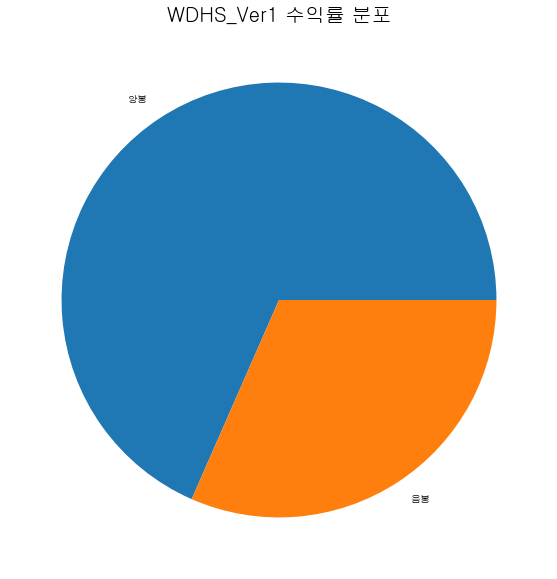

In [59]:
wdhs_ver3_winlose_test_pie1 = wdhs_ver3_winlose_test[wdhs_ver3_winlose_test["P_score"] < 70]
# wdhs_ver3_winlose_test_pie1 = wdhs_ver3_winlose_test[wdhs_ver3_winlose_test["P_score"]]
pie_list = [0,1]
pie_label = ["양봉", "음봉"]
pie_list[0] = len(wdhs_ver3_winlose_test_pie1[wdhs_ver3_winlose_test_pie1["pattern"] == "양봉"])
pie_list[1] = len(wdhs_ver3_winlose_test_pie1[wdhs_ver3_winlose_test_pie1["pattern"] == "음봉"])
plt.pie(pie_list, labels = pie_label)
plt.rcParams["figure.figsize"] = (10,10)
plt.rc('font',family=font_name)
plt.title('WDHS_Ver1 수익률 분포', fontsize=20)
plt.show()

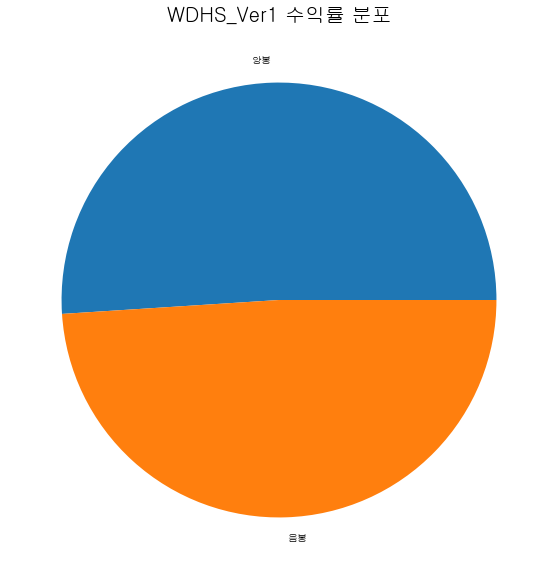

In [61]:
wdhs_ver3_winlose_test_pie1 = wdhs_ver3_winlose_test[70 <= wdhs_ver3_winlose_test["P_score"]]
wdhs_ver3_winlose_test_pie1 = wdhs_ver3_winlose_test[wdhs_ver3_winlose_test["P_score"] <= 75]
pie_list = [0,1]
pie_label = ["양봉", "음봉"]
pie_list[0] = len(wdhs_ver3_winlose_test_pie1[wdhs_ver3_winlose_test_pie1["pattern"] == "양봉"])
pie_list[1] = len(wdhs_ver3_winlose_test_pie1[wdhs_ver3_winlose_test_pie1["pattern"] == "음봉"])
plt.pie(pie_list, labels = pie_label)
plt.rcParams["figure.figsize"] = (10,10)
plt.rc('font',family=font_name)
plt.title('WDHS_Ver1 수익률 분포', fontsize=20)
plt.show()

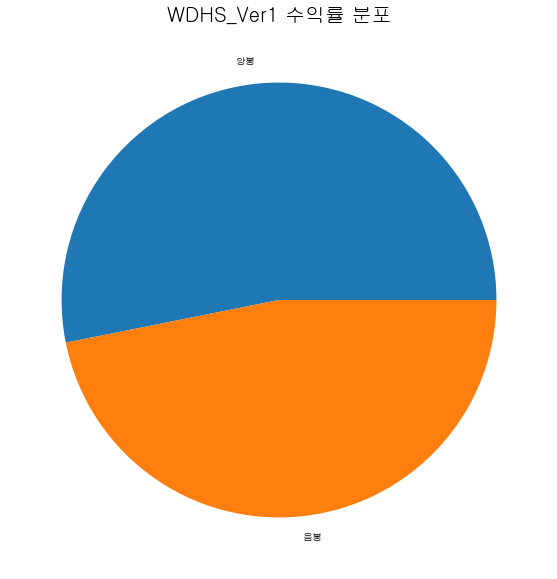

In [62]:
wdhs_ver3_winlose_test_pie1 = wdhs_ver3_winlose_test[75 <= wdhs_ver3_winlose_test["P_score"]]
wdhs_ver3_winlose_test_pie1 = wdhs_ver3_winlose_test[wdhs_ver3_winlose_test["P_score"] <= 80]
pie_list = [0,1]
pie_label = ["양봉", "음봉"]
pie_list[0] = len(wdhs_ver3_winlose_test_pie1[wdhs_ver3_winlose_test_pie1["pattern"] == "양봉"])
pie_list[1] = len(wdhs_ver3_winlose_test_pie1[wdhs_ver3_winlose_test_pie1["pattern"] == "음봉"])
plt.pie(pie_list, labels = pie_label)
plt.rcParams["figure.figsize"] = (10,10)
plt.rc('font',family=font_name)
plt.title('WDHS_Ver1 수익률 분포', fontsize=20)
plt.show()

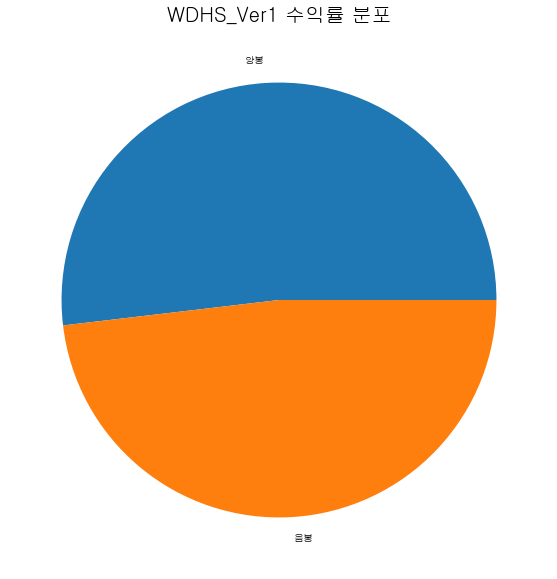

In [63]:
wdhs_ver3_winlose_test_pie1 = wdhs_ver3_winlose_test[80 <= wdhs_ver3_winlose_test["P_score"]]
wdhs_ver3_winlose_test_pie1 = wdhs_ver3_winlose_test[wdhs_ver3_winlose_test["P_score"] <= 85]
pie_list = [0,1]
pie_label = ["양봉", "음봉"]
pie_list[0] = len(wdhs_ver3_winlose_test_pie1[wdhs_ver3_winlose_test_pie1["pattern"] == "양봉"])
pie_list[1] = len(wdhs_ver3_winlose_test_pie1[wdhs_ver3_winlose_test_pie1["pattern"] == "음봉"])
plt.pie(pie_list, labels = pie_label)
plt.rcParams["figure.figsize"] = (10,10)
plt.rc('font',family=font_name)
plt.title('WDHS_Ver1 수익률 분포', fontsize=20)
plt.show()

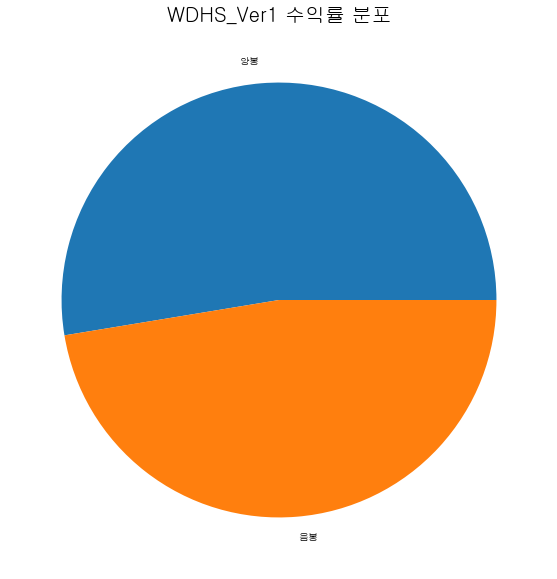

In [64]:
wdhs_ver3_winlose_test_pie1 = wdhs_ver3_winlose_test[85 <= wdhs_ver3_winlose_test["P_score"]]
wdhs_ver3_winlose_test_pie1 = wdhs_ver3_winlose_test[wdhs_ver3_winlose_test["P_score"] <= 90]
pie_list = [0,1]
pie_label = ["양봉", "음봉"]
pie_list[0] = len(wdhs_ver3_winlose_test_pie1[wdhs_ver3_winlose_test_pie1["pattern"] == "양봉"])
pie_list[1] = len(wdhs_ver3_winlose_test_pie1[wdhs_ver3_winlose_test_pie1["pattern"] == "음봉"])
plt.pie(pie_list, labels = pie_label)
plt.rcParams["figure.figsize"] = (10,10)
plt.rc('font',family=font_name)
plt.title('WDHS_Ver1 수익률 분포', fontsize=20)
plt.show()

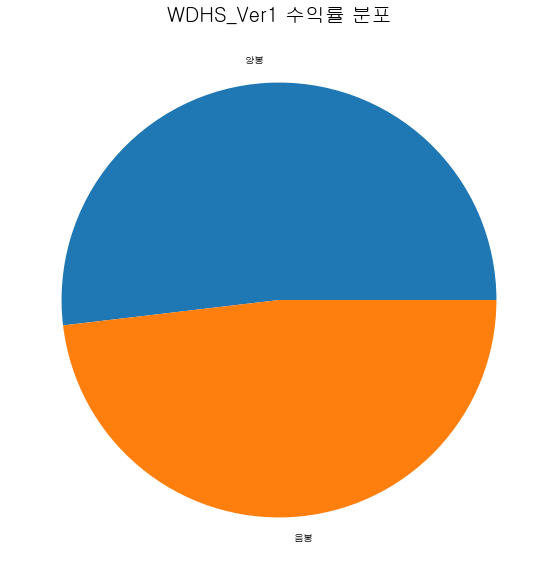

In [65]:
wdhs_ver3_winlose_test_pie1 = wdhs_ver3_winlose_test[90 <= wdhs_ver3_winlose_test["P_score"]]
wdhs_ver3_winlose_test_pie1 = wdhs_ver3_winlose_test[wdhs_ver3_winlose_test["P_score"] <= 95]
pie_list = [0,1]
pie_label = ["양봉", "음봉"]
pie_list[0] = len(wdhs_ver3_winlose_test_pie1[wdhs_ver3_winlose_test_pie1["pattern"] == "양봉"])
pie_list[1] = len(wdhs_ver3_winlose_test_pie1[wdhs_ver3_winlose_test_pie1["pattern"] == "음봉"])
plt.pie(pie_list, labels = pie_label)
plt.rcParams["figure.figsize"] = (10,10)
plt.rc('font',family=font_name)
plt.title('WDHS_Ver1 수익률 분포', fontsize=20)
plt.show()

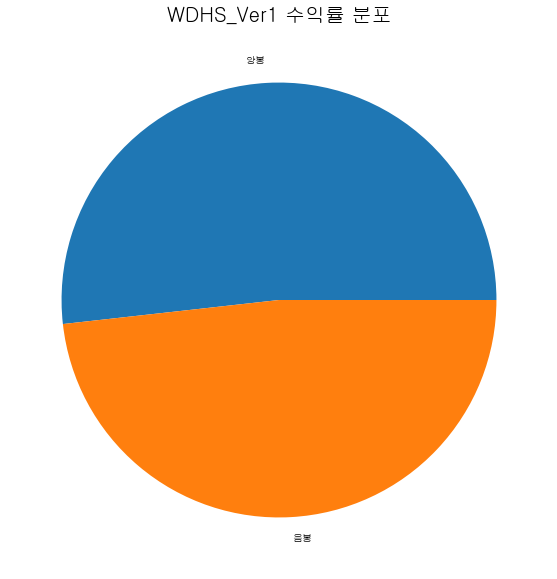

In [66]:
wdhs_ver3_winlose_test_pie1 = wdhs_ver3_winlose_test[95 <= wdhs_ver3_winlose_test["P_score"]]
wdhs_ver3_winlose_test_pie1 = wdhs_ver3_winlose_test[wdhs_ver3_winlose_test["P_score"] <= 100]
pie_list = [0,1]
pie_label = ["양봉", "음봉"]
pie_list[0] = len(wdhs_ver3_winlose_test_pie1[wdhs_ver3_winlose_test_pie1["pattern"] == "양봉"])
pie_list[1] = len(wdhs_ver3_winlose_test_pie1[wdhs_ver3_winlose_test_pie1["pattern"] == "음봉"])
plt.pie(pie_list, labels = pie_label)
plt.rcParams["figure.figsize"] = (10,10)
plt.rc('font',family=font_name)
plt.title('WDHS_Ver1 수익률 분포', fontsize=20)
plt.show()

In [99]:
df = pd.DataFrame({"ver" : [], "x_vic" : [], "x_lose" : [], "win_ratio" : []})
for j in range (50,499) :
    i = j*0.2
    wdhs_ver3_winlose_test_pie1 = wdhs_ver3_winlose_test[i < wdhs_ver3_winlose_test["P_score"]]
    wdhs_ver3_winlose_test_pie1 = wdhs_ver3_winlose_test_pie1[wdhs_ver3_winlose_test_pie1["P_score"] <= i+0.2]
    x_vic = len(wdhs_ver3_winlose_test_pie1[wdhs_ver3_winlose_test_pie1["pattern"] == "양봉"])
    x_lose = len(wdhs_ver3_winlose_test_pie1[wdhs_ver3_winlose_test_pie1["pattern"] == "음봉"])
    if x_vic + x_lose <5  :
        continue
    else : 
        print(i, "~", i+0.2)
        print(x_vic/(x_vic+x_lose))
        print(x_vic, " / " , (x_vic+x_lose))
        temp = pd.DataFrame({"ver" : [i], "x_vic" : [x_vic], "x_lose" : [x_lose], "win_ratio" :[x_vic/(x_vic+x_lose)]})
        df = df.append(temp)


72.4 ~ 72.60000000000001
0.5
3  /  6
73.60000000000001 ~ 73.80000000000001
0.5
3  /  6
74.0 ~ 74.2
0.6
3  /  5
74.4 ~ 74.60000000000001
0.2857142857142857
2  /  7
74.60000000000001 ~ 74.80000000000001
0.6
6  /  10
74.8 ~ 75.0
0.5555555555555556
5  /  9
75.0 ~ 75.2
0.5
4  /  8
75.2 ~ 75.4
0.4
2  /  5
75.4 ~ 75.60000000000001
0.5384615384615384
7  /  13
75.60000000000001 ~ 75.80000000000001
0.6666666666666666
8  /  12
75.8 ~ 76.0
0.7142857142857143
5  /  7
76.0 ~ 76.2
0.5555555555555556
5  /  9
76.2 ~ 76.4
0.6363636363636364
7  /  11
76.4 ~ 76.60000000000001
0.5454545454545454
6  /  11
76.60000000000001 ~ 76.80000000000001
0.6875
11  /  16
76.80000000000001 ~ 77.00000000000001
0.7142857142857143
10  /  14
77.0 ~ 77.2
0.4666666666666667
7  /  15
77.2 ~ 77.4
0.6
12  /  20
77.4 ~ 77.60000000000001
0.5
4  /  8
77.60000000000001 ~ 77.80000000000001
0.4
6  /  15
77.80000000000001 ~ 78.00000000000001
0.38461538461538464
5  /  13
78.0 ~ 78.2
0.5333333333333333
8  /  15
78.2 ~ 78.4
0.533333333333

In [95]:
df

,ver,x_vic,x_lose,win_ratio
0,72.4,3.0,3.0,0.500000
0,73.6,3.0,3.0,0.500000
0,74.0,3.0,2.0,0.600000
0,74.4,2.0,5.0,0.285714
0,74.6,6.0,4.0,0.600000
...,...,...,...,...
0,98.8,6.0,2.0,0.750000
0,99.0,5.0,8.0,0.384615
0,99.2,4.0,3.0,0.571429
0,99.4,8.0,1.0,0.888889


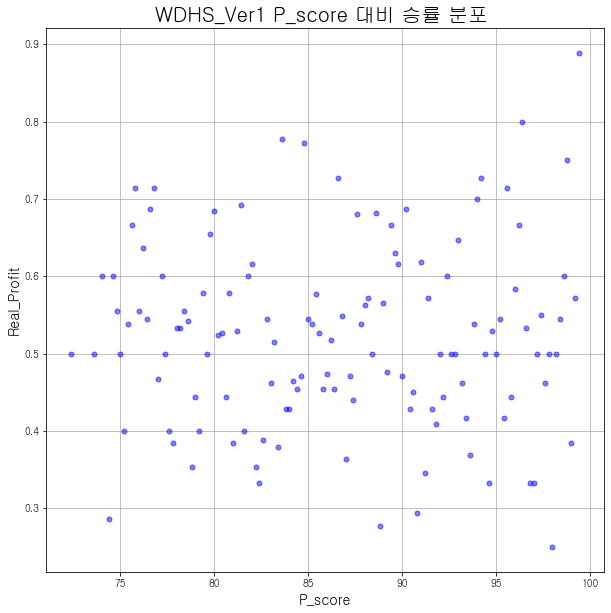

In [100]:
plt.plot('ver',  # x
         'win_ratio',  # y
         data=df, 
         linestyle='none', 
         marker='.', 
         markersize=10,
         color='blue', 
         alpha=0.5)
plt.rc('font', family=font_name)
plt.title('WDHS_Ver1 P_score 대비 승률 분포 ', fontsize=20)
plt.xlabel('P_score', fontsize=14)
plt.ylabel('Real_Profit', fontsize=14)
plt.show()

In [89]:
df2 = pd.DataFrame({"ver" : [], "x_vic" : [], "x_lose" : [], "win_ratio" : []})
for j in range (0,5000) :
    i = j*0.002 + 99
    wdhs_ver3_winlose_test_pie1 = wdhs_ver3_winlose_test[i < wdhs_ver3_winlose_test["P_score"]]
    wdhs_ver3_winlose_test_pie1 = wdhs_ver3_winlose_test_pie1[wdhs_ver3_winlose_test_pie1["P_score"] <= i+0.02]
    x_vic = len(wdhs_ver3_winlose_test_pie1[wdhs_ver3_winlose_test_pie1["pattern"] == "양봉"])
    x_lose = len(wdhs_ver3_winlose_test_pie1[wdhs_ver3_winlose_test_pie1["pattern"] == "음봉"])
    if x_vic + x_lose == 0 :
        continue
    else : 
        print(i, "~", i+0.2)
        print(x_vic/(x_vic+x_lose))
        print(x_vic, " / " , (x_vic+x_lose))
        temp = pd.DataFrame({"ver" : [i], "x_vic" : [x_vic], "x_lose" : [x_lose], "win_ratio" :[x_vic/(x_vic+x_lose)]})
        df2 = df2.append(temp)
df2

99.0 ~ 99.2
0.5
1  /  2
99.04 ~ 99.24000000000001
0.0
0  /  3
99.06 ~ 99.26
1.0
1  /  1
99.08 ~ 99.28
1.0
1  /  1
99.1 ~ 99.3
0.0
0  /  2
99.12 ~ 99.32000000000001
1.0
1  /  1
99.14 ~ 99.34
0.0
0  /  1
99.18 ~ 99.38000000000001
0.0
0  /  1
99.26 ~ 99.46000000000001
1.0
2  /  2
99.3 ~ 99.5
0.0
0  /  2
99.4 ~ 99.60000000000001
1.0
1  /  1
99.42 ~ 99.62
1.0
1  /  1
99.44 ~ 99.64
0.5
1  /  2
99.56 ~ 99.76
1.0
3  /  3
99.58 ~ 99.78
1.0
2  /  2
99.6 ~ 99.8
0.0
0  /  1
99.64 ~ 99.84
1.0
1  /  1
99.98 ~ 100.18
0.4892703862660944
114  /  233


,ver,x_vic,x_lose,win_ratio
0,99.00,1.0,1.0,0.50000
0,99.04,0.0,3.0,0.00000
0,99.06,1.0,0.0,1.00000
0,99.08,1.0,0.0,1.00000
0,99.10,0.0,2.0,0.00000
0,99.12,1.0,0.0,1.00000
0,99.14,0.0,1.0,0.00000
0,99.18,0.0,1.0,0.00000
0,99.26,2.0,0.0,1.00000
0,99.30,0.0,2.0,0.00000


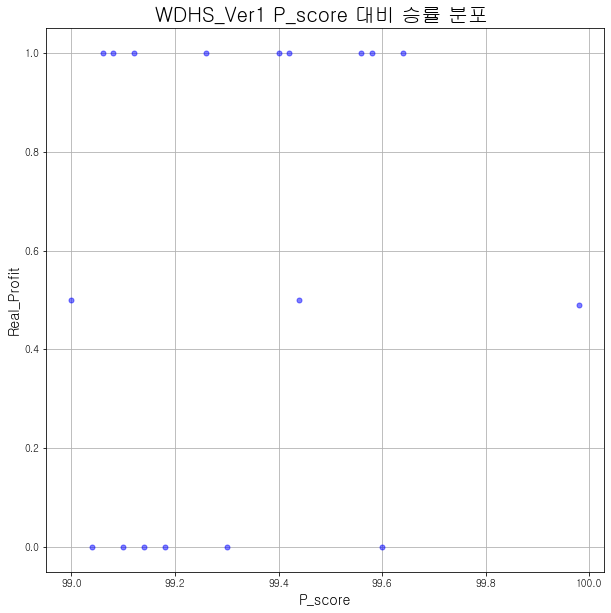

In [90]:
plt.plot('ver',  # x
         'win_ratio',  # y
         data=df2, 
         linestyle='none', 
         marker='.', 
         markersize=10,
         color='blue', 
         alpha=0.5)
plt.rc('font', family=font_name)
plt.title('WDHS_Ver1 P_score 대비 승률 분포 ', fontsize=20)
plt.xlabel('P_score', fontsize=14)
plt.ylabel('Real_Profit', fontsize=14)
plt.show()

99.98 ~ 100.18
0.4892703862660944
114  /  233


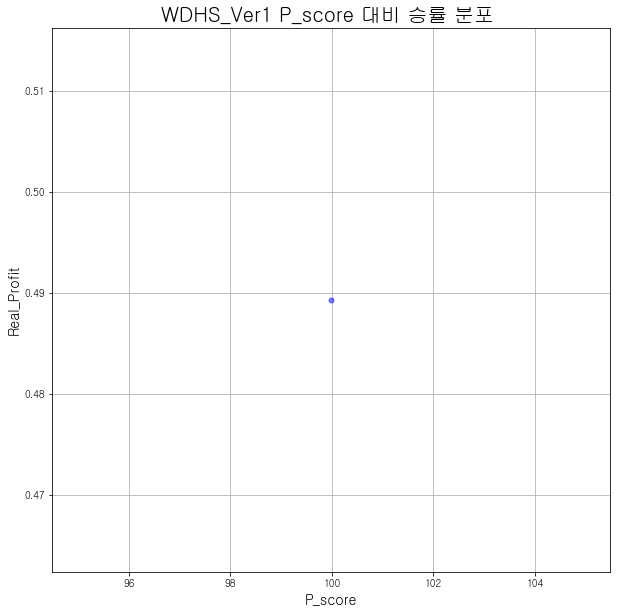

In [102]:
df2 = pd.DataFrame({"ver" : [], "x_vic" : [], "x_lose" : [], "win_ratio" : []})
for j in range (0,11) :
    i = 99.8 + j*0.02
    wdhs_ver3_winlose_test_pie1 = wdhs_ver3_winlose_test[i < wdhs_ver3_winlose_test["P_score"]]
    wdhs_ver3_winlose_test_pie1 = wdhs_ver3_winlose_test_pie1[wdhs_ver3_winlose_test_pie1["P_score"] <= i+0.02]
    x_vic = len(wdhs_ver3_winlose_test_pie1[wdhs_ver3_winlose_test_pie1["pattern"] == "양봉"])
    x_lose = len(wdhs_ver3_winlose_test_pie1[wdhs_ver3_winlose_test_pie1["pattern"] == "음봉"])
    if x_vic + x_lose <3  :
        continue
    else : 
        print(i, "~", i+0.2)
        print(x_vic/(x_vic+x_lose))
        print(x_vic, " / " , (x_vic+x_lose))
        temp = pd.DataFrame({"ver" : [i], "x_vic" : [x_vic], "x_lose" : [x_lose], "win_ratio" :[x_vic/(x_vic+x_lose)]})
        df2 = df2.append(temp)
plt.plot('ver',  # x
         'win_ratio',  # y
         data=df2, 
         linestyle='none', 
         marker='.', 
         markersize=10,
         color='blue', 
         alpha=0.5)
plt.rc('font', family=font_name)
plt.title('WDHS_Ver1 P_score 대비 승률 분포 ', fontsize=20)
plt.xlabel('P_score', fontsize=14)
plt.ylabel('Real_Profit', fontsize=14)
plt.show()